<a href="https://colab.research.google.com/github/Ahmadtito17/Machine_Learning/blob/main/Jobsheet11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Nama   : Ahmad Tito N.H

NIM    : 2141720265

Kelas  : TI-3G

_________________________________________

**Jobsheet 11 - Convolutional Neural Network (CNN)**

_________________________________________

# **Praktikum 1<br>**
Klasifikasi 🐱 dan 🐶

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Langkah 1 - Import Library**

In [2]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator

**Langkah 2 - Pra Pengolahan  Data<br>**
Langkah 2.1 Pra Pengolahan Data Training

In [17]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/Machine Learning/dataset/training_set',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

Found 1045 images belonging to 2 classes.


Langkah 2.2 Pra Pengolahan Data Testing

In [5]:
test_datagen = ImageDataGenerator(rescale = 1./255)
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/Machine Learning/dataset/test_set',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary')

Found 1085 images belonging to 2 classes.


**Langkah 3 - Pembuatan Model CNN<br>**
Langkah 3.1 Inisialisasi Model CNN

In [6]:
cnn = tf.keras.models.Sequential()

Langkah 3.2 Pembuatan Layer Konvolusi 1

In [7]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[64, 64, 3]))

Langkah 3.3 - Pembuatan Layer Pooling 1

In [8]:
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

Langkah 3.4 - Pembuatan Layer Konvolusi 2 dan Pooling 2

In [9]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

Langkah 3.5 - Flattening

In [10]:
cnn.add(tf.keras.layers.Flatten())

Langkah 3.6 - Fully Connected Layer 1 (Input)

In [11]:
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))

Langkah 3.7 - Fully Connected Layer 2 (Output)

In [12]:
cnn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

Langkah 3.8 - Compile Model CNN

In [13]:
cnn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

**Langkah 4 - Fit CNN**

In [18]:
cnn.fit(x = training_set, validation_data = test_set, epochs = 25)

Epoch 1/25
33/33 [==============================] - 191s 6s/step - loss: 0.0181 - accuracy: 1.0000 - val_loss: 4.7127 - val_accuracy: 0.9217
Epoch 2/25
33/33 [==============================] - 7s 224ms/step - loss: 3.8216e-13 - accuracy: 1.0000 - val_loss: 5.0324 - val_accuracy: 0.9217
Epoch 3/25
33/33 [==============================] - 7s 216ms/step - loss: 1.2550e-13 - accuracy: 1.0000 - val_loss: 5.0458 - val_accuracy: 0.9217
Epoch 4/25
33/33 [==============================] - 8s 250ms/step - loss: 5.4815e-13 - accuracy: 1.0000 - val_loss: 5.0463 - val_accuracy: 0.9217
Epoch 5/25
33/33 [==============================] - 7s 222ms/step - loss: 1.0927e-13 - accuracy: 1.0000 - val_loss: 5.0463 - val_accuracy: 0.9217
Epoch 6/25
33/33 [==============================] - 8s 257ms/step - loss: 7.5683e-13 - accuracy: 1.0000 - val_loss: 5.0463 - val_accuracy: 0.9217
Epoch 7/25
33/33 [==============================] - 7s 225ms/step - loss: 6.2434e-11 - accuracy: 1.0000 - val_loss: 5.0463 - val_

Langkah 5 - Prediksi dengan 1 Citra

In [19]:
import numpy as np
from keras.preprocessing import image
test_image = image.load_img('/content/drive/MyDrive/Machine Learning/dataset/single_prediction/cat_or_dog_1.jpg', target_size = (64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = cnn.predict(test_image)
training_set.class_indices
if result[0][0] == 1:
  prediction = 'dog'
else:
  prediction = 'cat'

1/1 [==============================] - 0s 182ms/step


In [31]:
print ("Prediction: ", prediction)

Prediction:  cat


# **Praktikum 2<br>**
Klasifikasi Multi-label dengan Data CIFAT

Langkah 1 - Load Library

In [20]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

Langkah 2 - Unduh Dataset CIFAR

In [21]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

170498071/170498071 [==============================] - 2s 0us/step


Langkah 3 - Verifikasi Data

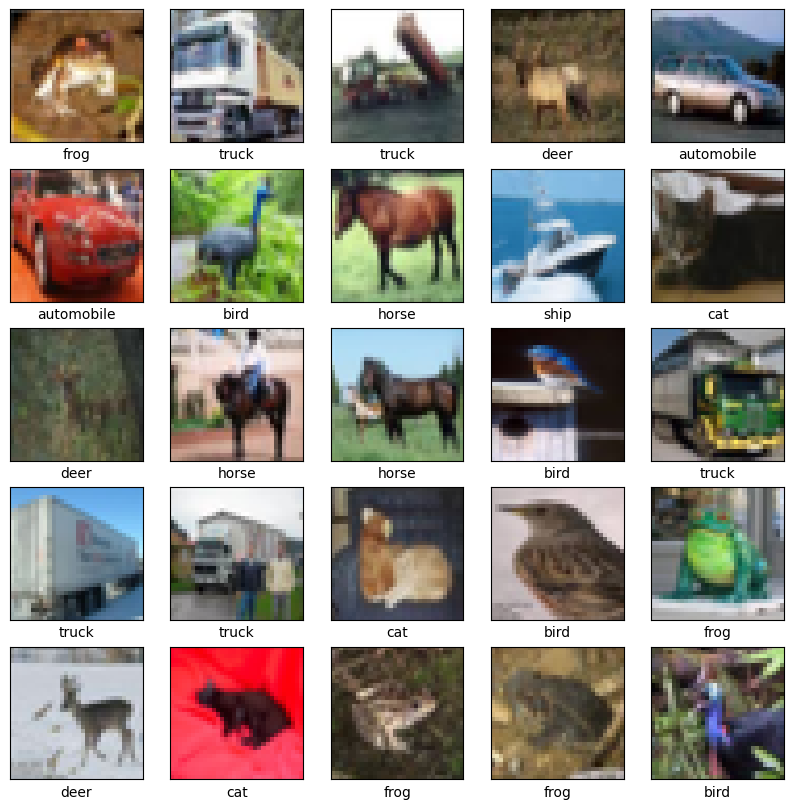

In [22]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
              'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    # The CIFAR labels happen to be arrays,
    # which is why you need the extra index
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

**Langkah 4 - Buat Model CNN<br>**
Langkah 4.1. - Buat Layer Konvolusi

In [23]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

Langkah 4.2. - Cek Arsitektur Konvolusi

In [24]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 15, 15, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
Total params: 56320 (220.00 KB)
Trainable params: 5632

Langkah 4.3. - Tambahkan Layer Fully Connected

In [25]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

Langkah 4.4. - Cek Arsitektur Model CNN

In [26]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 15, 15, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten_1 (Flatten)         (None, 1024)             

Langkah 4.5. - Compile Model CNN

In [27]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

**Langkah 5 - Fit Model**

In [28]:
history = model.fit(train_images, train_labels, epochs=10,
                    validation_data=(test_images, test_labels))

Epoch 1/10
1563/1563 [==============================] - 15s 8ms/step - loss: 1.5050 - accuracy: 0.4539 - val_loss: 1.2493 - val_accuracy: 0.5476
Epoch 2/10
1563/1563 [==============================] - 12s 8ms/step - loss: 1.1320 - accuracy: 0.5970 - val_loss: 1.0913 - val_accuracy: 0.6151
Epoch 3/10
1563/1563 [==============================] - 14s 9ms/step - loss: 0.9826 - accuracy: 0.6543 - val_loss: 0.9774 - val_accuracy: 0.6565
Epoch 4/10
1563/1563 [==============================] - 16s 10ms/step - loss: 0.8813 - accuracy: 0.6882 - val_loss: 0.9439 - val_accuracy: 0.6729
Epoch 5/10
1563/1563 [==============================] - 11s 7ms/step - loss: 0.8165 - accuracy: 0.7136 - val_loss: 0.8966 - val_accuracy: 0.6895
Epoch 6/10
1563/1563 [==============================] - 11s 7ms/step - loss: 0.7555 - accuracy: 0.7329 - val_loss: 0.8660 - val_accuracy: 0.7070
Epoch 7/10
1563/1563 [==============================] - 10s 7ms/step - loss: 0.7094 - accuracy: 0.7498 - val_loss: 0.8629 - val_a

**Langkah 6 - Evaluasi Model**

313/313 - 1s - loss: 0.8704 - accuracy: 0.7201 - 1s/epoch - 4ms/step


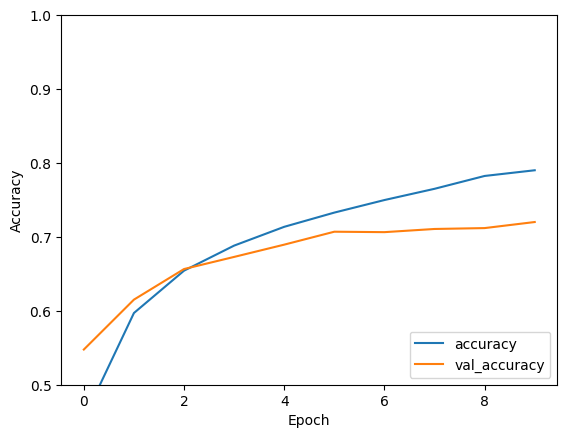

In [29]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)

**Langkah 7 - Cetak Hasil Akurasi**

In [30]:
print(test_acc)

0.7200999855995178


# **Tugas Praktikum<br>**

*   Modifikasi model CNN pada praktikum 2 sehingga didapatkan akurasi testing lebih dari 80%.
*   Buatlah model CNN untuk klasifikasi dataset MNIST.
_________________________________________


**1. Modifikasi model CNN pada praktikum 2 sehingga didapatkan akurasi testing lebih dari 80%**

In [32]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [33]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

In [34]:
train_images, test_images = train_images / 255.0, test_images / 255.0

In [35]:
model = models.Sequential()

In [36]:
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

In [37]:
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.5))  # Dropout layer to reduce overfitting
model.add(layers.Dense(10, activation='softmax'))

In [38]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [39]:
history = model.fit(train_images, train_labels, epochs=20, validation_data=(test_images, test_labels))

Epoch 1/20
1563/1563 [==============================] - 15s 8ms/step - loss: 1.6237 - accuracy: 0.4042 - val_loss: 1.2940 - val_accuracy: 0.5347
Epoch 2/20
1563/1563 [==============================] - 11s 7ms/step - loss: 1.2503 - accuracy: 0.5554 - val_loss: 1.0824 - val_accuracy: 0.6121
Epoch 3/20
1563/1563 [==============================] - 11s 7ms/step - loss: 1.0832 - accuracy: 0.6216 - val_loss: 0.9494 - val_accuracy: 0.6682
Epoch 4/20
1563/1563 [==============================] - 12s 8ms/step - loss: 0.9766 - accuracy: 0.6590 - val_loss: 0.9055 - val_accuracy: 0.6813
Epoch 5/20
1563/1563 [==============================] - 12s 8ms/step - loss: 0.8959 - accuracy: 0.6893 - val_loss: 0.8883 - val_accuracy: 0.6902
Epoch 6/20
1563/1563 [==============================] - 14s 9ms/step - loss: 0.8315 - accuracy: 0.7109 - val_loss: 0.9008 - val_accuracy: 0.6900
Epoch 7/20
1563/1563 [==============================] - 15s 10ms/step - loss: 0.7773 - accuracy: 0.7304 - val_loss: 0.8861 - val_a

In [40]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f"Test accuracy: {test_acc}")

313/313 - 1s - loss: 0.9656 - accuracy: 0.7412 - 1s/epoch - 4ms/step
Test accuracy: 0.7411999702453613


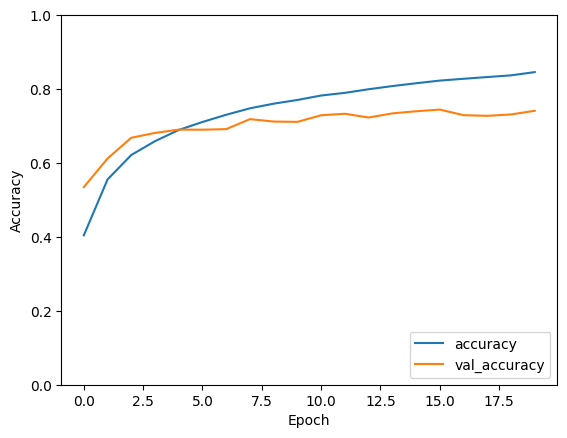

In [41]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()

**2. Model CNN untuk klasifikasi dataset MNIST**

In [42]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [43]:
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [44]:
train_images, test_images = train_images / 255.0, test_images / 255.0

In [45]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [46]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [47]:
history = model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))

Epoch 1/10
1875/1875 [==============================] - 14s 6ms/step - loss: 0.1481 - accuracy: 0.9535 - val_loss: 0.0453 - val_accuracy: 0.9859
Epoch 2/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0453 - accuracy: 0.9863 - val_loss: 0.0350 - val_accuracy: 0.9887
Epoch 3/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0336 - accuracy: 0.9891 - val_loss: 0.0463 - val_accuracy: 0.9865
Epoch 4/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0260 - accuracy: 0.9922 - val_loss: 0.0300 - val_accuracy: 0.9899
Epoch 5/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0203 - accuracy: 0.9937 - val_loss: 0.0334 - val_accuracy: 0.9897
Epoch 6/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0159 - accuracy: 0.9953 - val_loss: 0.0292 - val_accuracy: 0.9916
Epoch 7/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0138 - accuracy: 0.9953 - val_loss: 0.0324 - val_ac

In [48]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print(f"Test accuracy: {test_acc}")

313/313 - 1s - loss: 0.0350 - accuracy: 0.9912 - 1s/epoch - 3ms/step
Test accuracy: 0.9911999702453613


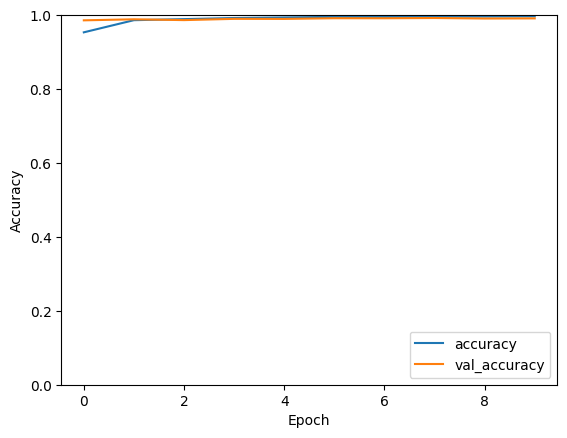

In [49]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()